In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
real = pd.read_csv("CHI-JA-WLOOP-ATT-PING-MERGED.csv")
synth = pd.read_csv("clean-data-simu5g-normal.csv")


/tmp/ipykernel_675183/2044110427.py:1: DtypeWarning: Columns (138,139,146,161,162,169,178,179,186,192,195,202,205,208,215,218,221,228,231,234,241) have mixed types. Specify dtype option on import or set low_memory=False.
  real = pd.read_csv("CHI-JA-WLOOP-ATT-PING-MERGED.csv")


In [3]:
synth.columns

Index(['positionX:vector', 'positionY:vector', 'servingRSRP:vector',
       'servingRSRQ:vector', 'servingSINR:vector', 'servingDistance:vector',
       'servingCell:vector', 'timestamp:vector', 'UEid:vector',
       'rlcThroughputDl:vector'],
      dtype='object')

### RSRP

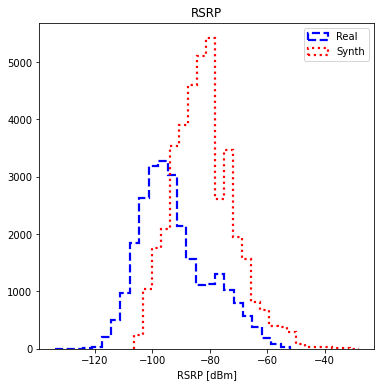

In [4]:
real_rsrp = real["5G KPI PCell RF Serving SS-RSRP [dBm]"]
synth_rsrp = synth["servingRSRP:vector"].sample(40000)


fig, ax = plt.subplots(figsize=(6,6))
fig = plt.gcf()
ax.hist(real_rsrp, bins=25, label="Real", histtype="step", edgecolor='blue', linewidth=2.2, linestyle="--")
ax.set_xlabel("RSRP [dBm]")
ax.hist(synth_rsrp, bins=25, label="Synth", histtype="step", edgecolor='red', linewidth=2.2,linestyle=":")
plt.title("RSRP")
plt.legend()
plt.savefig('./plots/RSRP.png', facecolor="white")
plt.show()

### RSRQ

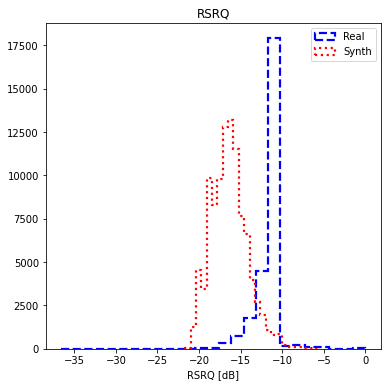

In [5]:
real_rsrq = real["5G KPI PCell RF Serving SS-RSRQ [dB]"]
synth_rsrq = synth["servingRSRQ:vector"]

_, ax = plt.subplots(figsize=(6, 6))

ax.hist(real_rsrq, bins=25, label="Real", histtype="step", edgecolor='blue', linewidth=2.2, linestyle="--")
ax.set_xlabel("RSRQ [dB]")
ax.hist(synth_rsrq, bins=25, label="Synth", histtype="step", edgecolor='red', linewidth=2.2,linestyle=":")

plt.title("RSRQ")
plt.legend()
plt.savefig('./plots/RSRQ.png', facecolor="white")

### SINR

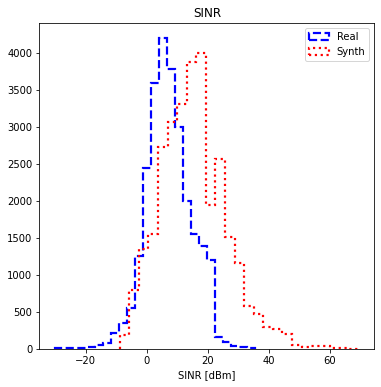

In [6]:
real_sinr = real["5G KPI PCell RF Serving SS-SINR [dB]"]
synth_sinr = synth["servingSINR:vector"].sample(30000)

_, ax = plt.subplots(figsize=(6, 6))

ax.hist(real_sinr, bins=25, label="Real", histtype="step", edgecolor='blue', linewidth=2.2, linestyle="--")
ax.set_xlabel("SINR [dBm]")
ax.hist(synth_sinr, bins=25, label="Synth", histtype="step", edgecolor='red', linewidth=2.2,linestyle=":")
plt.title("SINR")

plt.legend()
plt.savefig('./plots/SINR.png', facecolor="white")

### Throughput

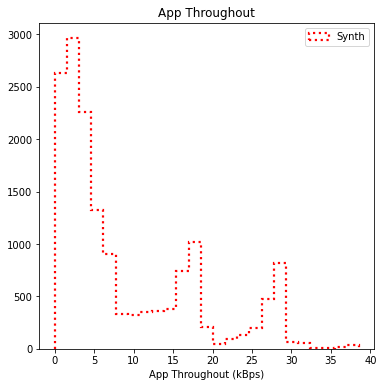

In [7]:
#real_th = real["5G KPI PCell Layer1 PDSCH Throughput [Mbps]"]
synth_th = synth["rlcThroughputDl:vector"].div(1000) #Convert Bps to kBps

_, ax = plt.subplots(figsize=(6, 6))

#ax.hist(real_th, bins=25, label="Real", histtype="step", edgecolor='blue', linewidth=2.2, linestyle="--")
ax.set_xlabel("App Throughout (kBps)")
ax.hist(synth_th, bins=25, label="Synth", histtype="step", edgecolor='red', linewidth=2.2,linestyle=":" )
plt.title("App Throughout")

plt.legend()
plt.savefig('./plots/Throughput.png', facecolor="white")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


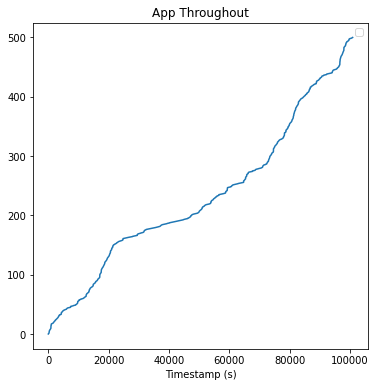

In [10]:
#real_th = real["5G KPI PCell Layer1 PDSCH Throughput [Mbps]"]
timestamp = synth["timestamp:vector"]

_, ax = plt.subplots(figsize=(6, 6))

#ax.hist(real_th, bins=25, label="Real", histtype="step", edgecolor='blue', linewidth=2.2, linestyle="--")
ax.set_xlabel("Timestamp (s)")
#ax.hist(synth_th, bins=25, label="Synth", histtype="step", edgecolor='red', linewidth=2.2,linestyle=":" )
ax.plot(timestamp)
plt.title("App Throughout")

plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


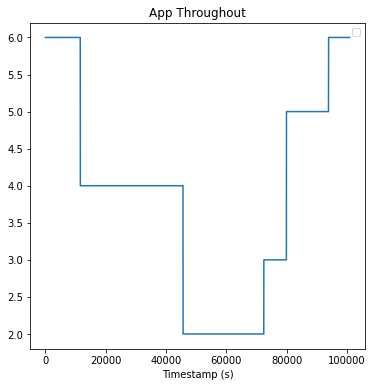

In [15]:
#real_th = real["5G KPI PCell Layer1 PDSCH Throughput [Mbps]"]
timestamp = synth["servingCell:vector"]

_, ax = plt.subplots(figsize=(6, 6))

#ax.hist(real_th, bins=25, label="Real", histtype="step", edgecolor='blue', linewidth=2.2, linestyle="--")
ax.set_xlabel("Timestamp (s)")
#ax.hist(synth_th, bins=25, label="Synth", histtype="step", edgecolor='red', linewidth=2.2,linestyle=":" )
ax.plot(timestamp)
plt.title("App Throughout")

plt.legend()